In [24]:
from math import factorial

def Cn(n, x):
	return factorial(n) // (factorial(x) * factorial(n - x))

def binomial(n, p, x):
    return Cn(n,x) * p**n * (1-p)**(n-x)

In [1]:
# Ejercicio n°4 Normal
# El retorno diario de cierto activo financiero sigue una distribución normal, con una media de 0,60% y un desvío típico de 0,15%.
# a)¿Cuál es la probabilidad de que, en un día cualquiera, este activo haya brindado un retorno entre el 0,42% y el 0,90%, 
# si se sabe que fue superior al 0,51%?

import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

mu = 0.006
sigma = 0.0015

# a)¿Cuál es la probabilidad de que, en un día cualquiera, este activo haya brindado un retorno entre el 0,42% y el 0,90%, 
# si se sabe que fue superior al 0,51%?

#Es un ejercicio de probabilidad condicional, por lo que se puede aplicar la fórmula:
#P(A|B) = P(A ∩ B) / P(B)
#Donde A es el evento de que el retorno esté entre 0.42% y 0.90% y B es el evento de que el retorno sea superior a 0.51%.

#P(A ∩ B) = P(0.42% < X < 0.90% y X > 0.51%) = P(0.51% < X < 0.90%)
#P(B) = P(X > 0.51%)
#P(A|B) = P(0.51% < X < 0.90%) / P(X > 0.51%)
#P(X > 0.51%) = 1 - P(X < 0.51%)
px_minor_0_0051 = stats.norm.cdf(0.0051, mu, sigma)
p_minor_0_009 = stats.norm.cdf(0.0090, mu, sigma)
p_minor_0_042 = stats.norm.cdf(0.0042, mu, sigma)

p_a_cond_b = (p_minor_0_009 - px_minor_0_0051) / (1 - px_minor_0_0051)
print(f'La probabilidad de que, en un día cualquiera, este activo haya brindado un retorno entre el 0,42% y el 0,90%, si se sabe que fue superior al 0,51%, es: {p_a_cond_b:.4f} ({p_a_cond_b*100:.2f}%)')



La probabilidad de que, en un día cualquiera, este activo haya brindado un retorno entre el 0,42% y el 0,90%, si se sabe que fue superior al 0,51%, es: 0.9687 (96.87%)


In [20]:
# b)¿Cuál es el retorno diario que no es superado el 1% de las veces?

#Para calcular el retorno diario que no es superado el 1% de las veces, se puede utilizar la función percentil de la distribución normal.
#Esto se puede hacer utilizando la función ppf (percent point function) de la librería scipy.stats.
percentil_1 = stats.norm.ppf(0.99, mu, sigma)

# El valor de Z correspondiente al percentil 1% es -2.326 ( que representa el punto donde el 1% de los datos están a la izquierda en una normal estándar.)
z = stats.norm.ppf(0.01)

# Calculamos el retorno diario que no es superado el 1% de las veces
x = mu + z * sigma
print(f'El retorno diario que no es superado el 1% de las veces es: {x:.4f} ({x*100:.4}%)')


El retorno diario que no es superado el 1% de las veces es: 0.0025 (0.251%)


In [ ]:
# c)# Un inversor piensa comprar acciones de este activo y venderlas 15 ruedas más tarde (es decir, 15 días hábiles posteriores) y 
# desea saber la probabilidad de que, en más de dos ruedas, la rentabilidad diaria sea por lo menos del 0,75%

from scipy.stats import norm, binom

# Distribución normal de la rentabilidad diaria
mu = 0.006       # 0,60%
sigma = 0.0015     # 0,15%

# Calculamos P(X > 0.0075) usando la normal
p = 1 - norm.cdf(0.0075, loc=mu, scale=sigma)

print(f"Probabilidad de un día con rentabilidad > 0.75%: {p:.4f}")

# Ahora usamos ese p en la distribución binomial
n = 15  # número de ruedas

# Probabilidad de que más de 2 días superen 0.75%
p_0 = binom.pmf(0,n,p)
print(f"Probabilidad de que 0 días superen 0.75%: {p_0:.4f}")
p_1 = binom.pmf(1,n,p)
print(f"Probabilidad de que 1 día supere 0.75%: {p_1:.4f}")
p_2 = binom.pmf(2,n,p)
print(f"Probabilidad de que 2 días superen 0.75%: {p_2:.4f}")
    
prob = 1 - p_0 - p_1 - p_2  #binom.cdf(2, n, p)

print(f"Probabilidad de que más de 2 días superen 0.75%: {prob:.4f}")


Probabilidad de un día con rentabilidad > 0.75%: 0.1587
Probabilidad de que más de 2 días superen 0.75%: 0.4334


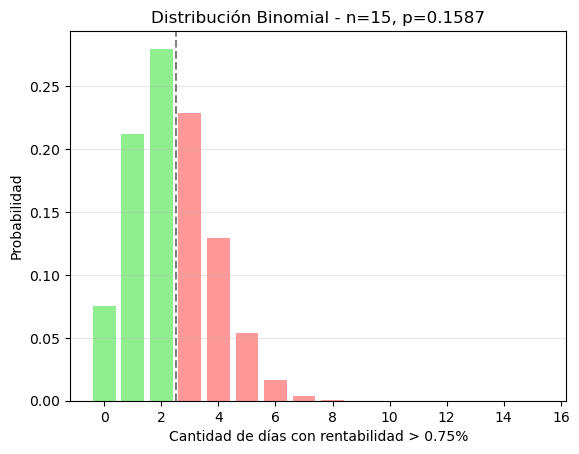

Probabilidad de que más de 2 días superen 0.75%: 0.4334


In [39]:
import matplotlib.pyplot as plt
from scipy.stats import norm, binom
import numpy as np

# Parámetros
media = 0.006
desvio = 0.0015
umbral = 0.0075
n = 15

# Probabilidad diaria de superar el umbral
p = 1 - norm.cdf(umbral, loc=media, scale=desvio)

# Distribución binomial
x = np.arange(0, n+1)
pmf_vals = binom.pmf(x, n, p)

# Gráfico
plt.bar(x, pmf_vals, color=["#90ee90" if xi <= 2 else "#ff9999" for xi in x])
plt.axvline(2.5, color="gray", linestyle="--")
plt.title(f"Distribución Binomial - n={n}, p={p:.4f}")
plt.xlabel("Cantidad de días con rentabilidad > 0.75%")
plt.ylabel("Probabilidad")
plt.grid(axis="y", alpha=0.3)
plt.show()

# Resultado numérico
prob_mas_de_2 = 1 - binom.cdf(2, n, p)
print(f"Probabilidad de que más de 2 días superen 0.75%: {prob_mas_de_2:.4f}")
